In [159]:
# 1. Найти данные для классификации.
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [160]:
# Предобработать данные, если это необходимо.
target = df['output']
print(target.head())

predictors = df.drop('output', axis=1)
predictors.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [161]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


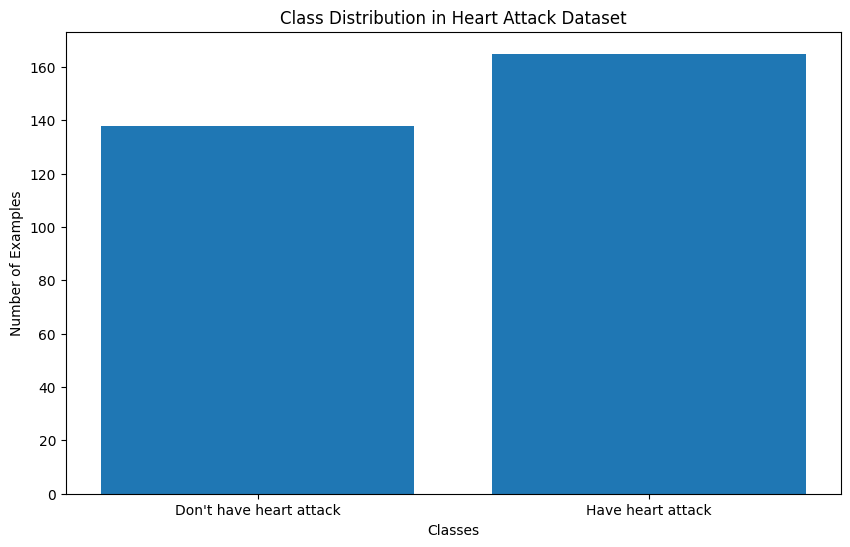

In [163]:
# 2. Изобразить гистограмму, которая показывает баланс классов.
import matplotlib.pyplot as plt

# Подсчет количества примеров для каждого класса
class_counts = target.value_counts()

# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)

# Настройка меток и заголовка
plt.xticks(class_counts.index, labels=['Have heart attack', 'Don\'t have heart attack'])
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.title('Class Distribution in Heart Attack Dataset')

# Отображение гистограммы
plt.show()

In [164]:
# 3. Разбить выборку на тренировочную и тестовую.
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочную и тестовую выборки (80% данных для обучения, 20% для тестирования)
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size = 0.8, random_state=420)

print(' Размер для признаков обучающей выборки',x_train.shape, '\n',
'Размер для признаков тестовой выборки',x_test.shape, '\n',
'Размер для целевого показателя обучающей выборки',y_train.shape, '\n',
'Размер для показателя тестовой выборки',y_test.shape)

 Размер для признаков обучающей выборки (242, 13) 
 Размер для признаков тестовой выборки (61, 13) 
 Размер для целевого показателя обучающей выборки (242,) 
 Размер для показателя тестовой выборки (61,)


In [165]:
# 4. Применить алгоритмы классификации

# Логистическая регрессия
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression(max_iter=10000, random_state = 420) #используем логистическую pегрессию
model.fit(x_train, y_train)
y_predict = model.predict(x_test) #производим mесты на основе обученной модели
print('Предсказанные значения: \n',y_predict)
print('Исходные значения \n',np.array(y_test))

# Построить матрицу ошибок
from sklearn.metrics import confusion_matrix
import plotly.express as px

fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')
fig.update_layout(coloraxis_colorbar_x=0.7)
fig.show()

Предсказанные значения: 
 [0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0]
Исходные значения 
 [0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]


In [166]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_kernel = ('linear', 'rbf', 'poly', 'sigmoid') # для nеребора ядер
parameters = {'kernel':param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv = 6) #сетка для перебора параметров
grid_search_svm.fit(x_train, y_train) # обучаем модели с разными параметрами
best_model = grid_search_svm.best_estimator_
print('Лучшая модель: ', best_model.kernel, '\n') #лучшая модель получилась с линейным ядром

svm_preds = best_model.predict(x_test) # строим прогноз
print('Предсказанные значения: \n',svm_preds)
print('Исходные значения \n',np.array(y_test))

# Построить матрицу ошибок
fig = px.imshow(confusion_matrix(svm_preds, y_test), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')
fig.update_layout(coloraxis_colorbar_x=0.7)
fig.show()

Лучшая модель:  linear 

Предсказанные значения: 
 [0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0]
Исходные значения 
 [0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]


In [167]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

number_of_neighbors = np.arange(2, 100) # количество соседей для перебора
params = {"n_neighbors": number_of_neighbors}
model_KNN = KNeighborsClassifier() # инициализация модели
grid_search = GridSearchCV(estimator = model_KNN, param_grid = params, cv = 6) # задание параметров для поиска по сетке

grid_search.fit(x_train, y_train) #обучение модели
print(grid_search.best_score_) #лучшее значение macro-average
print(grid_search.best_estimator_, '\n') # лучшая модель получается при k = 20

knn_preds = grid_search.predict(x_test) # результат работы модели для тестовых данных
print('Предсказанные значения: \n',knn_preds)
print('Исходные значения \n',np.array(y_test))

# Построить матрицу ошибок
fig = px.imshow(confusion_matrix(knn_preds, y_test), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')
fig.update_layout(coloraxis_colorbar_x=0.7)
fig.show()

0.6695121951219513
KNeighborsClassifier(n_neighbors=20) 

Предсказанные значения: 
 [1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0]
Исходные значения 
 [0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1
 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0]


In [168]:
# 5. Сравнить результаты классификации
from sklearn.metrics import classification_report
print('Логистическая регрессия classification_report:')
print(classification_report(y_test, y_predict))

Логистическая регрессия classification_report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.74      0.74      0.74        27

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [169]:
# Сравнить результаты классификации
print('SVM classification_report:')
print(classification_report(svm_preds,y_test))

SVM classification_report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.74      0.74      0.74        27

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [170]:
# Сравнить результаты классификации
print('KNN classification_report:')
print(classification_report(knn_preds,y_test))

KNN classification_report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        31
           1       0.74      0.67      0.70        30

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

